In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import community.community_louvain as community
import seaborn as sns

In [5]:
#data collection and pre-processing

page_url= 'https://networkrepository.com/soc-hamsterster.php'
data = pd.read_csv('/content/soc-hamsterster.edges',
                   sep='\s+',  # this is to seperate any white space
                   comment='%',  # Ignore the first lines that have '%'
                   header=None,
                   names=['Hamsterster ID', 'Connected to'])

data.head(100) # I only output the first 100 data to check the format of the dataframe

Hamsterster ID  Connected to
0                1             2
1                1             3
2                1             4
3                1             5
4                1             6
..             ...           ...
95               2          2214
96               2          2239
97               2          2240
98               2          2241
99               2          2242

[100 rows x 2 columns]

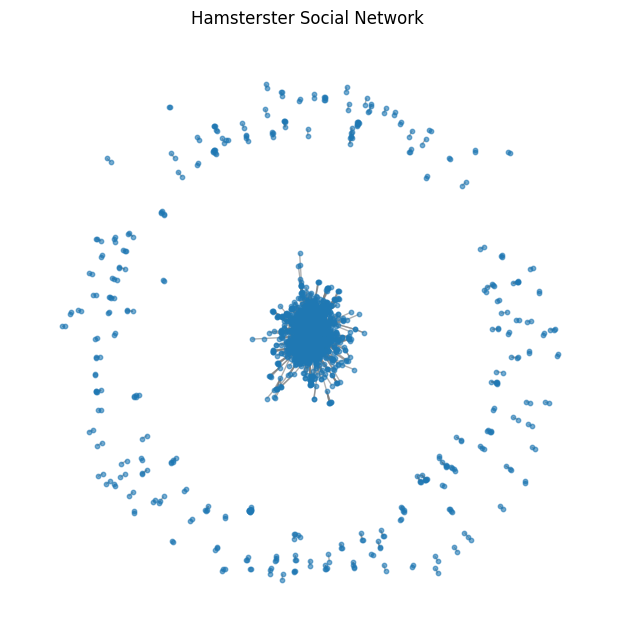

In [6]:
# Network construction and visualization

G = nx.Graph() # create an empty graph using NetworkX
G.add_edges_from(data.values)  # Add edges from the dataframe the empty graph



pos = nx.spring_layout(G, seed=42) #I choosed the spring_layout function form networkx library for a good visualistaion of the network


plt.figure(figsize=(6, 6))
nx.draw(G, pos, node_size=10, edge_color="gray", alpha=0.6, with_labels=False)
plt.title("Hamsterster Social Network ")
plt.show()

In [7]:
# summary of the network
print('summary of network')
# print both nodes and edges for clearity
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

summary of network
Number of nodes: 2426
Number of edges: 16630


**Network Analysis**

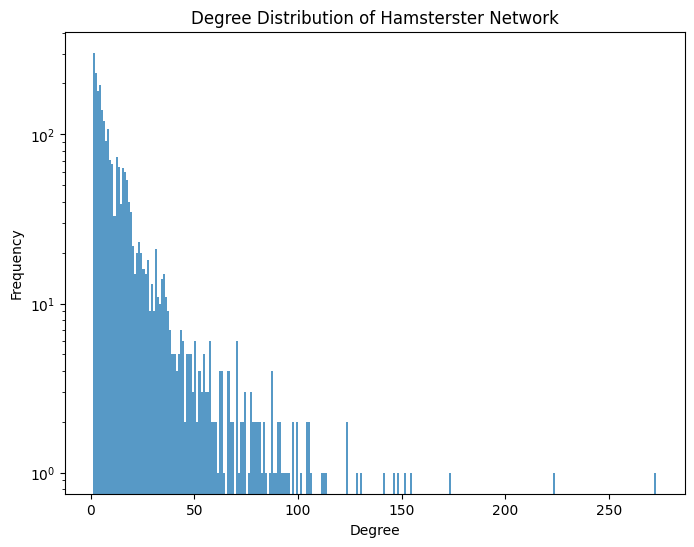

In [8]:
# Degree distributon

# Calculate degree of each node
degree_sequence = [d for n, d in G.degree()]

# Plot degree distribution
plt.figure(figsize=(8, 6))
plt.hist(degree_sequence, bins=range(min(degree_sequence), max(degree_sequence) + 1), alpha=0.75)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of Hamsterster Network")
plt.yscale("log")
plt.show()



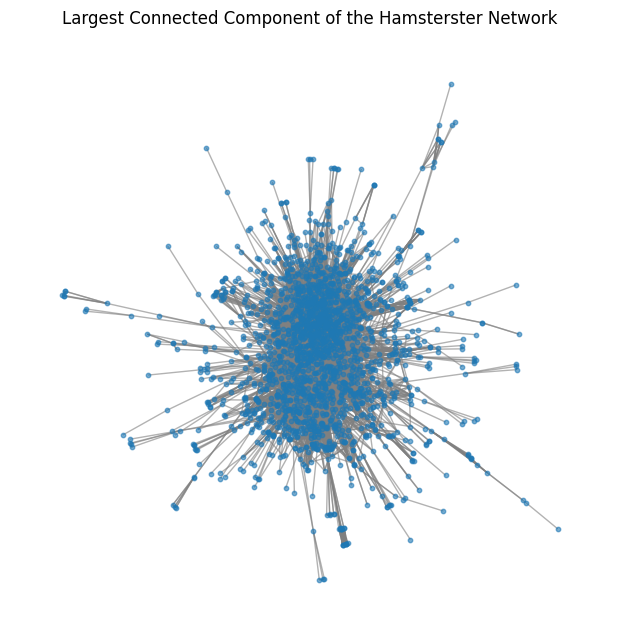

Number of Connected Components: 148
Size of the Largest Connected Component: 2000


In [9]:
# Connected Component Analysins

# count how many of connected components are in the graph
num_components = nx.number_connected_components(G)


# Get the largest connected component (LCC) from the list of CC that we got from the last step
largest_cc = max(nx.connected_components(G), key=len)
G_largest = G.subgraph(largest_cc).copy() # create a copy of the graph with only LCC to make anlysis easier



plt.figure(figsize=(6, 6))
pos = nx.spring_layout(G_largest, seed=42)
nx.draw(G_largest, pos, node_size=10, edge_color="gray", alpha=0.6, with_labels=False)
plt.title("Largest Connected Component of the Hamsterster Network")
plt.show()

print(f"Number of Connected Components: {num_components}")
print(f"Size of the Largest Connected Component: {len(G_largest.nodes())}")

In [10]:
subgraph = G.subgraph(largest_cc) # call the graph that containts the LCC so we can make the anlysis on it
diameter = nx.diameter(subgraph)

clustering_coeff = nx.average_clustering(G)# this function it will run on the whole graph not the subgraph

print(f'the diameter:{diameter}')
print(f'the clustering coefficent:{clustering_coeff}')



the diameter:10
the clustering coefficent:0.5375333362074072


In [11]:
#Path analysis I : globally shortest path of the whole network


# call the subgarph of the LCC to work on it
subgraph = G.subgraph(largest_cc)

min_length = float("inf")  # this variable is to store the minimum path length and it is set by defaut to have an infinity length
closest_pair = None  # each time we found a node closer to the node selected which is node 1 we store it in this variable and its set as empty variable by default

# this is a dictionnary that store all the shortest paths found in the graph and it stores the (source_node,target_node: path between them )
shortest_paths = dict(nx.all_pairs_shortest_path_length(G))

for node1, targets in shortest_paths.items(): # outer loop
    for node2, path_length in targets.items(): # inner loop
        if node1 != node2 and path_length < min_length:  # set a condition to not have a path = 0
            min_length = path_length
            closest_pair = (node1, node2)  # Store the pair with the shortest path

# Compute the actual shortest path for the updated pair
shortest_path = nx.shortest_path(G, source=closest_pair[0], target=closest_pair[1])

# convert the output to integer for a cleaner path
shortest_path = [int(node) for node in shortest_path]


print(f"Shortest path length: {min_length}")
print(f"Path between nodes: {shortest_path}")



Shortest path length: 1
Path between nodes: [1, 2]


**Explaining the loop**

 **The outer loop :** it iterates over each nodes in the dict shortest path and treat it like source node (node1) to check all the shortest path from that node to all other nodes

**The inner loop :** it iterates over all possible target node (node2) that the source node in the outer loop can reach . Then with the if condition it checks for the shoertest path and store it in the min_length variable , it also updates the result found in the closest_pair variable .


Shortest path from 1 to 2368: [1, 6, 53, 2364, 2368]


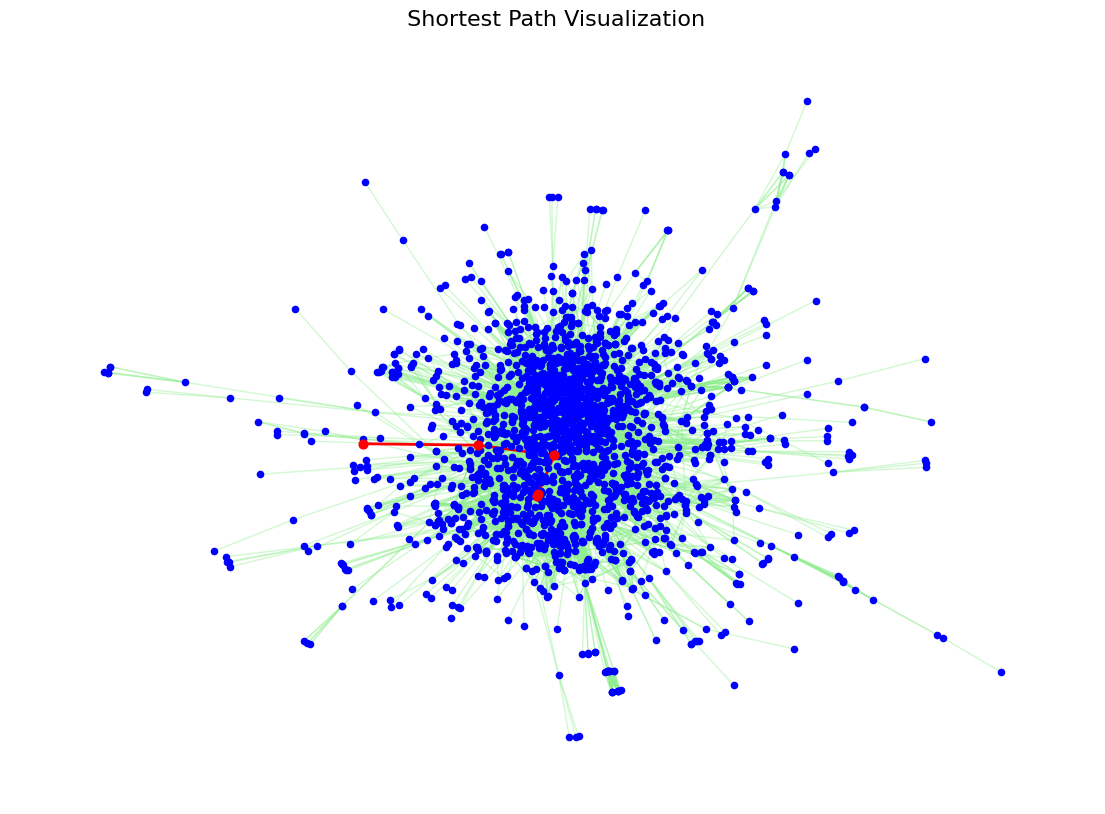

In [12]:
# Path analysis II : find the shortest path from 2 randomly selcted nodes

subgraph = G.subgraph(largest_cc) # call the subgraph of LCC created earlier again

#store all the nodes of the subgraph in a list and then select te first node as source and the last node as target from the list
nodes = list(subgraph.nodes())
source, target = nodes[0], nodes[-1]

try: # here we are going to compute the shortest path between the nodes selected from te list earlier
    shortest_path = [int(n) for n in nx.shortest_path(subgraph, source=source, target=target)]
    print(f"Shortest path from {source} to {target}: {shortest_path}")

    # visualisation of results
    pos = nx.spring_layout(subgraph, seed=42)  # Position layout
    plt.figure(figsize=(14, 10))
    # Draw all nodes in blue and edges in green
    nx.draw_networkx_edges(subgraph, pos, edge_color='lightgreen', alpha=0.4)
    nx.draw_networkx_nodes(subgraph, pos, node_size=20, node_color='blue')
    # Draw the shortest path that we found earlier in red
    path_edges = list(zip(shortest_path, shortest_path[1:]))
    nx.draw_networkx_edges(subgraph, pos, edgelist=path_edges, edge_color='red', width=2)
    nx.draw_networkx_nodes(subgraph, pos, nodelist=shortest_path, node_color='red', node_size=40)


    plt.title(" Shortest Path Visualization", fontsize=16)
    plt.axis('off')
    plt.show()

except nx.NetworkXNoPath: # if no path is found , then print that no path exists
    print(f"No path exists between {source} and {target}.")


In [13]:
# density Analysis

# get the LCC subgraph for density anlysis (I will explain why on the texxt box below)
if not nx.is_connected(G):
    largest_cc = max(nx.connected_components(G), key=len)
    G_density = G.subgraph(largest_cc).copy()
else:
    G_density = G

# Compute density using the function from NetworkX
density = nx.density(G_density)

print(f"Network Density: {density:.6f}")


Network Density: 0.008053


**Explaining why i choosed to make the anlysis on the Connected component subgraph :**

Analysing the density over the LCC subgraph offers more accurate view of the actual connection between the connected nodes in the graph because when we run it over the entire graph the isolated or disconnected nodes will lower the overall density of the network and won't really give insights about the interactive structure of the network .

**Centrallity Analysis:**

In the following cells we will call everytime the appropriate centrality metrics'function from NetworkX library to run over the G_density subgraph that we used earlier .

In [14]:
# PageRank centralitty

pagerank = nx.pagerank(G_density)
top_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]# only get the most 10 central nodes
print("Top 10 Nodes by PageRank:")
for node, score in top_pagerank:
    print(f"Node {node}: {score:.6f}")#print the result with 6 decimal numbers


Top 10 Nodes by PageRank:
Node 73: 0.006784
Node 121: 0.005246
Node 6: 0.004607
Node 301: 0.004381
Node 69: 0.003754
Node 189: 0.003518
Node 202: 0.003457
Node 313: 0.003293
Node 21: 0.003267
Node 622: 0.003118


In [15]:
#Eigenvector centrality

eigen_centrality = nx.eigenvector_centrality(G_density, max_iter=1000)
top_eigen = sorted(eigen_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Nodes by Eigenvector Centrality:")
for node, score in top_eigen:
    print(f"Node {node}: {score:.6f}")


Top 10 Nodes by Eigenvector Centrality:
Node 73: 0.211469
Node 121: 0.185885
Node 202: 0.143649
Node 617: 0.123659
Node 242: 0.120463
Node 301: 0.118556
Node 622: 0.117672
Node 629: 0.117489
Node 874: 0.113721
Node 612: 0.112968


In [16]:
#Betweenness Centrality

betweenness = nx.betweenness_centrality(G_density)
top_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Nodes by Betweenness Centrality:")
for node, score in top_betweenness:
    print(f"Node {node}: {score:.6f}")


Top 10 Nodes by Betweenness Centrality:
Node 73: 0.081096
Node 6: 0.060423
Node 69: 0.059369
Node 121: 0.040979
Node 13: 0.039149
Node 301: 0.036275
Node 66: 0.029419
Node 21: 0.029056
Node 159: 0.026419
Node 2: 0.024521


In [17]:
# Closeness centrality
closeness = nx.closeness_centrality(G_density)
top_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Nodes by Closeness Centrality:")
for node, score in top_closeness:
    print(f"Node {node}: {score:.6f}")


Top 10 Nodes by Closeness Centrality:
Node 73: 0.423427
Node 69: 0.419165
Node 121: 0.408793
Node 622: 0.397179
Node 617: 0.395998
Node 131: 0.395216
Node 66: 0.394514
Node 612: 0.393504
Node 629: 0.392345
Node 202: 0.391654


In [18]:
# create the dataframe
centrality_df = pd.DataFrame({
    'PageRank': pagerank,
    'Eigenvector': eigen_centrality,
    'Betweenness': betweenness,
    'Closeness': closeness
})

# Get top 10 based on their PageRank score to show their overall centrality
top_nodes = centrality_df.sort_values('PageRank', ascending=False).head(10) # I used decending order
display(top_nodes)


PageRank  Eigenvector  Betweenness  Closeness
73   0.006784     0.211469     0.081096   0.423427
121  0.005246     0.185885     0.040979   0.408793
6    0.004607     0.034709     0.060423   0.386504
301  0.004381     0.118556     0.036275   0.390811
69   0.003754     0.107958     0.059369   0.419165
189  0.003518     0.098052     0.015713   0.380834
202  0.003457     0.143649     0.023517   0.391654
313  0.003293     0.102847     0.013855   0.382877
21   0.003267     0.019313     0.029056   0.362861
622  0.003118     0.117672     0.017104   0.397179

**Comparision of the network with the three synthisized networks : Erdős–Rényi (ER) , Barabási–Albert (BA) , Watts–Strogatz (WS) :**





Hamsterster Graph -  Nodes: 2426, Edges: 16630, Avg Degree: 13


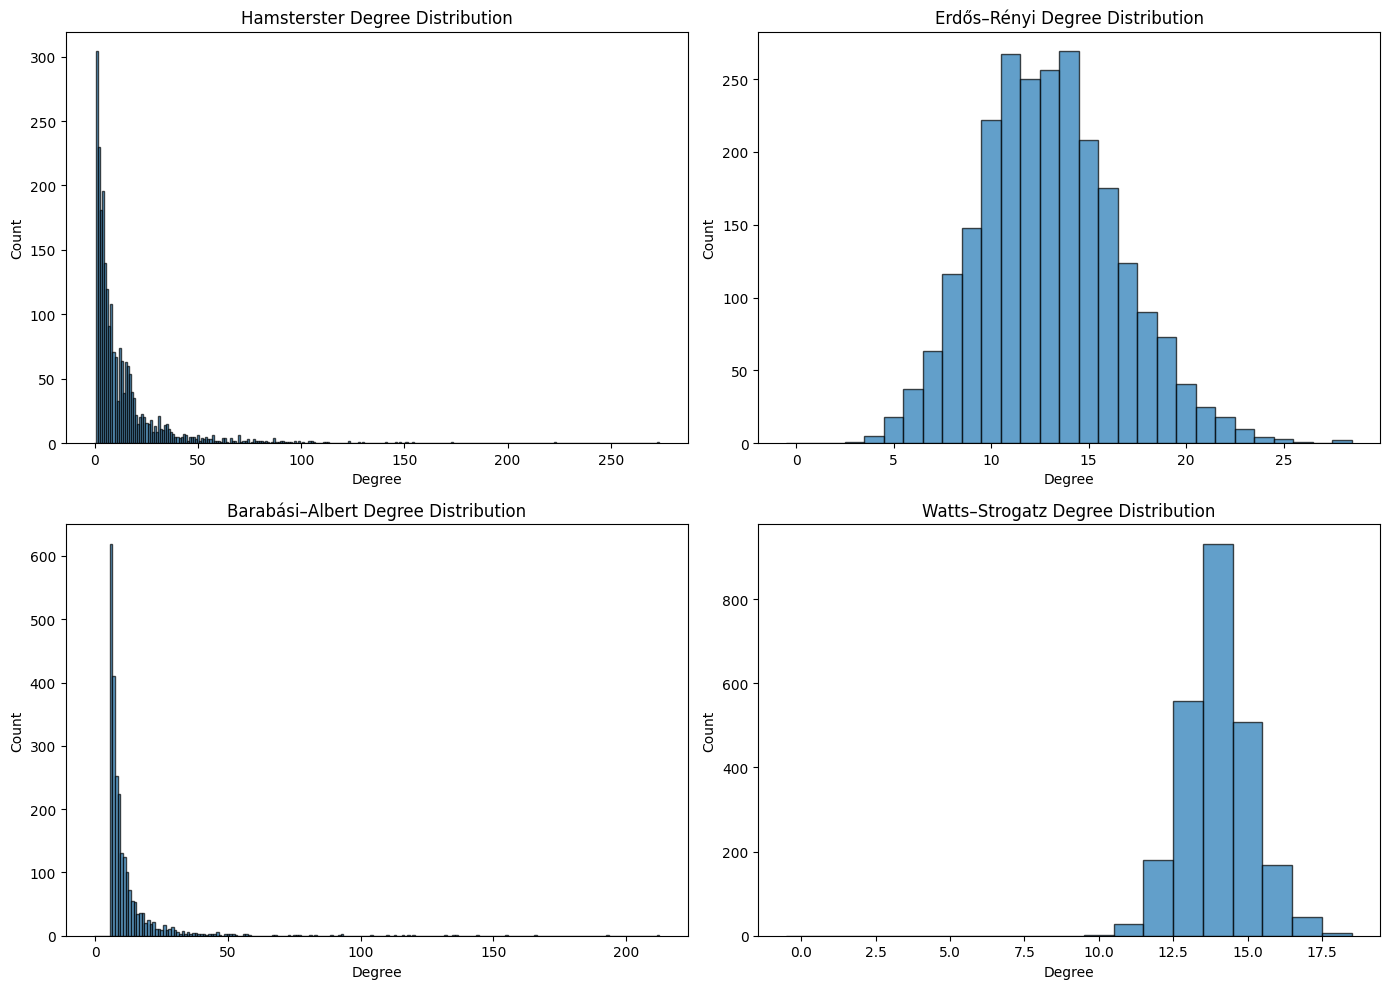


Hamsterster Graph:
  Clustering Coefficient: 0.5375
  Diameter: 10

Erdős–Rényi Graph:
  Clustering Coefficient: 0.0055
  Diameter: 5

Barabási–Albert Graph:
  Clustering Coefficient: 0.0230
  Diameter: 5

Watts–Strogatz Graph:
  Clustering Coefficient: 0.5080
  Diameter: 7


In [19]:
# comparision metrics : deg_distribution, diameter , clustering_coff and avg_degree
# first step is to call our hamsterster graph and define the number of nodes that we are going to use for the other networks accordinaly

G_ham = G

num_nodes = G_ham.number_of_nodes() # the same number of nodes as G_ham
num_edges = G_ham.number_of_edges() # the same number of edges as G_ham
avg_degree = int((2 * num_edges) / num_nodes)

print(f"Hamsterster Graph -  Nodes: {num_nodes}, Edges: {num_edges}, Avg Degree: {avg_degree}")

# define the setting of the syntthesised networks with the same sixe of G_ham
p_er = avg_degree / (num_nodes - 1)
m_ba = max(1, avg_degree // 2)
k_ws = avg_degree if avg_degree % 2 == 0 else avg_degree + 1
p_ws = 0.1

# call the networkX functions to create the 3 synthesised networks
G_er = nx.erdos_renyi_graph(num_nodes, p_er)
G_ba = nx.barabasi_albert_graph(num_nodes, m_ba)
G_ws = nx.watts_strogatz_graph(num_nodes, k_ws, p_ws)


# create a dictionnary with all the 4 graphs
graphs = {
    "Hamsterster": G_ham,
    "Erdős–Rényi": G_er,
    "Barabási–Albert": G_ba,
    "Watts–Strogatz": G_ws
}

# generate the graphs statistics
results = {}
for name, G in graphs.items():
  clustering = nx.average_clustering(G)
  if name == "Hamsterster":
        # For real graph, calculate on full graph
      try:
        diameter = nx.diameter(subgraph)
      except nx.NetworkXError:
          diameter = "Graph not connected"
  else:
      if nx.is_connected(G):
          diameter = nx.diameter(G)
      else:
        diameter = "Graph not connected"


  degree_sequence = [d for _, d in G.degree()] # get the degrees of the nodes in each graph to use it in the degree dist

  results[name] = { # store the outputs of the loop in this dictionnary
        "Clustering Coefficient": clustering,
        "Diameter": diameter,
        "Degree Sequence": degree_sequence
    }
# create a  visualisations for degree distribution

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, (name, G) in enumerate(graphs.items()):
    degree_sequence = results[name]["Degree Sequence"]

    axes[idx].hist(
        degree_sequence,
        bins=np.arange(0, max(degree_sequence)+2) - 0.5,
        edgecolor='black',
        alpha=0.7
    )
    axes[idx].set_title(f"{name} Degree Distribution")
    axes[idx].set_xlabel("Degree")
    axes[idx].set_ylabel("Count")

plt.tight_layout()
plt.show()

#print the clustering and the diameter of each graph
for name, metrics in results.items():
    print(f"\n{name} Graph:")
    print(f"  Clustering Coefficient: {metrics['Clustering Coefficient']:.4f}")
    print(f"  Diameter: {metrics['Diameter']}")


In [20]:
#comparision metrics : centralitty anlyss metrics

# Define the graphs'dictionnary
graphs = {
    "Hamsterster": G_ham,
    "Erdős–Rényi": G_er,
    "Barabási–Albert": G_ba,
    "Watts–Strogatz": G_ws
}

# create a function to compute all centralities in once for each graph
def compute_centralities(G):
    centralities = {} # create an empty dictionnary to store the results in it
    centralities["PageRank"] = nx.pagerank(G)
    centralities["Betweenness"] = nx.betweenness_centrality(G)
    centralities["Closeness"] = nx.closeness_centrality(G)
    try:
       centralities["Eigenvector"] = nx.eigenvector_centrality(G, max_iter=1000)# it have a maximum of 1000 iteration  before stopping
    except nx.NetworkXError:
        centralities["Eigenvector"] = {n: 0 for n in G.nodes()}# in case it fails to get the PageRank for some node it will set it to 0 so the loop dosent' break
    return centralities


# Collect stats per graph
centrality_summary = {} # the summary dictionnary where final results will be stored

for name, G in graphs.items():

    c = compute_centralities(G)# call the fnction that we created earlier

    summary = {
        "PageRank_Max": max(c["PageRank"].values()), # we don't need to compute the pagerank mean because it is the same fro all 4 networks since they all got the same number of nodes
        "Betweenness_Max": max(c["Betweenness"].values()),
        "Betweenness_Mean": sum(c["Betweenness"].values()) / len(c["Betweenness"]),
        "Closeness_Max": max(c["Closeness"].values()),
        "Closeness_Mean": sum(c["Closeness"].values()) / len(c["Closeness"]),
        "Eigenvector_Max": max(c["Eigenvector"].values()),
        "Eigenvector_Mean": sum(c["Eigenvector"].values()) / len(c["Eigenvector"]),
    }

    centrality_summary[name] = summary

# Merge all the results in one single dataframe
df_centrality = pd.DataFrame(centrality_summary).T
df_centrality = df_centrality.round(5)

# display the final dataframe
print("Centrality Measure Comparison:")
display(df_centrality)


Centrality Measure Comparison:


PageRank_Max  Betweenness_Max  Betweenness_Mean  \
Hamsterster           0.00559          0.05510           0.00073   
Erdős–Rényi           0.00082          0.00397           0.00096   
Barabási–Albert       0.00628          0.08024           0.00086   
Watts–Strogatz        0.00051          0.00658           0.00136   

                 Closeness_Max  Closeness_Mean  Eigenvector_Max  \
Hamsterster            0.34904         0.19453          0.21147   
Erdős–Rényi            0.33643         0.30128          0.04577   
Barabási–Albert        0.47840         0.32611          0.25925   
Watts–Strogatz         0.25675         0.23346          0.03355   

                 Eigenvector_Mean  
Hamsterster               0.00886  
Erdős–Rényi               0.01939  
Barabási–Albert           0.01318  
Watts–Strogatz            0.02005

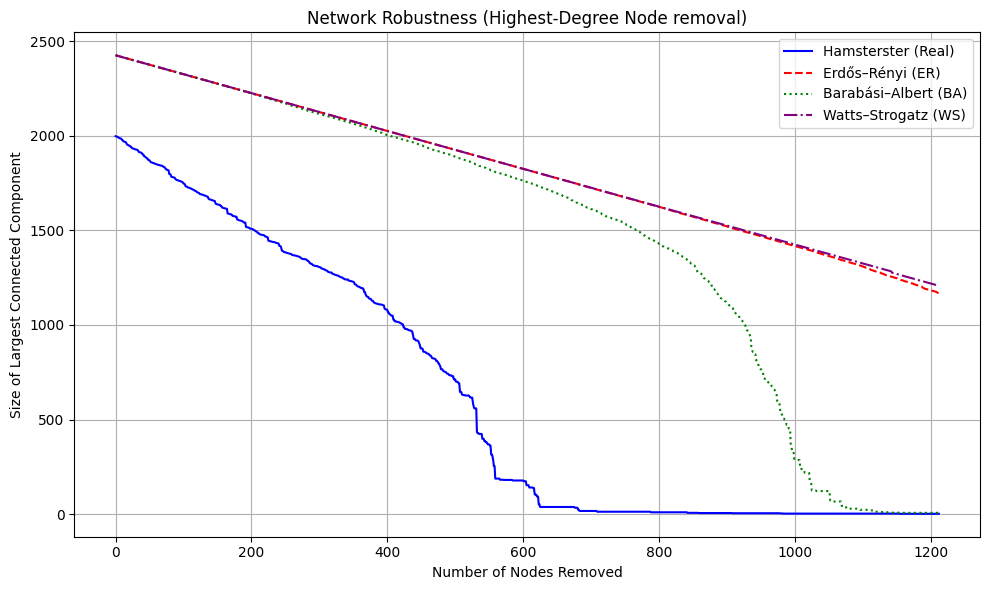

In [21]:
# Robustness check : removal of highest node degree

# This function gets the giant component of each graph
def largest_component_size(G):
    if len(G) == 0:
        return 0
    return max(len(c) for c in nx.connected_components(G))

# this function checks the giant component after the removal of the highest-degree node
def highest_degree_attack(G, num_removals=None):
    G = G.copy()
    if num_removals is None:
        num_removals = len(G) // 2 # we set the maximux number of removal to half the number of nodes of the network

    giant_sizes = [] # this is a list to store the new giant component after the removals

    for _ in range(num_removals):
        if len(G) == 0:
            break # we stop removing nodes after reaching the limit of nodes set earlier (half of the garph)

        # Identify highest-degree node
        highest_degree_node = max(G.degree, key=lambda x: x[1])[0]
        G.remove_node(highest_degree_node)

        # add the new giant componenet after the removal
        giant_sizes.append(largest_component_size(G))

    return giant_sizes

# run the new function over the 4 networks
attack_ham = highest_degree_attack(G_ham)
attack_er = highest_degree_attack(G_er)
attack_ba = highest_degree_attack(G_ba)
attack_ws = highest_degree_attack(G_ws)

# visualise the results in a linechart plot

plt.figure(figsize=(10, 6))
plt.plot(attack_ham, label="Hamsterster (Real)", color='blue')
plt.plot(attack_er, label="Erdős–Rényi (ER)", color='red', linestyle='dashed')
plt.plot(attack_ba, label="Barabási–Albert (BA)", color='green', linestyle='dotted')
plt.plot(attack_ws, label="Watts–Strogatz (WS)", color='purple', linestyle='dashdot')

plt.xlabel("Number of Nodes Removed")
plt.ylabel("Size of Largest Connected Component")
plt.title("Network Robustness (Highest-Degree Node removal)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


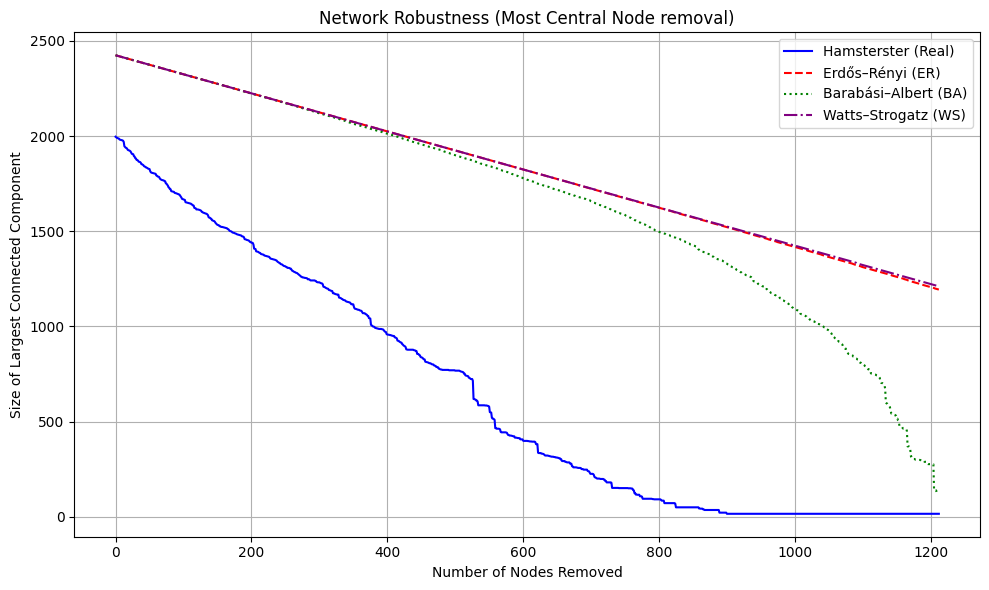

In [22]:
# Robustness check : removal of the most central node

def largest_component_size(G):
    if len(G) == 0:
      return 0
    else :
      return max(len(c) for c in nx.connected_components(G))

# I created a 'function attack_central_node' that takes a copy of the graph ,
#get the most centred node of the giant component and remove it ,
#then again after removing it, takes the new giant component that we have , get its most central node , remove it and get the new giant componenet

def attack_central_node(G, num_removals=None):
    G = G.copy()
    if num_removals is None:
        num_removals = len(G) // 2


    centrality = nx.betweenness_centrality(G)# get the central node
    sorted_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
    nodes_to_remove = [n for n, _ in sorted_nodes[:num_removals]]

    giant_sizes = []

    for node in nodes_to_remove:
        if node not in G:
            continue
        G.remove_node(node)
        giant_sizes.append(largest_component_size(G))

    return giant_sizes
# run the function over the 4 networks
c_attack_ham = attack_central_node(G_ham)
c_attack_er = attack_central_node(G_er)
c_attack_ba = attack_central_node(G_ba)
c_attack_ws = attack_central_node(G_ws)


plt.figure(figsize=(10, 6))
plt.plot(c_attack_ham, label="Hamsterster (Real)", color='blue')
plt.plot(c_attack_er, label="Erdős–Rényi (ER)", color='red', linestyle='dashed')
plt.plot(c_attack_ba, label="Barabási–Albert (BA)", color='green', linestyle='dotted')
plt.plot(c_attack_ws, label="Watts–Strogatz (WS)", color='purple', linestyle='dashdot')

plt.xlabel("Number of Nodes Removed")
plt.ylabel("Size of Largest Connected Component")
plt.title("Network Robustness (Most Central Node removal)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

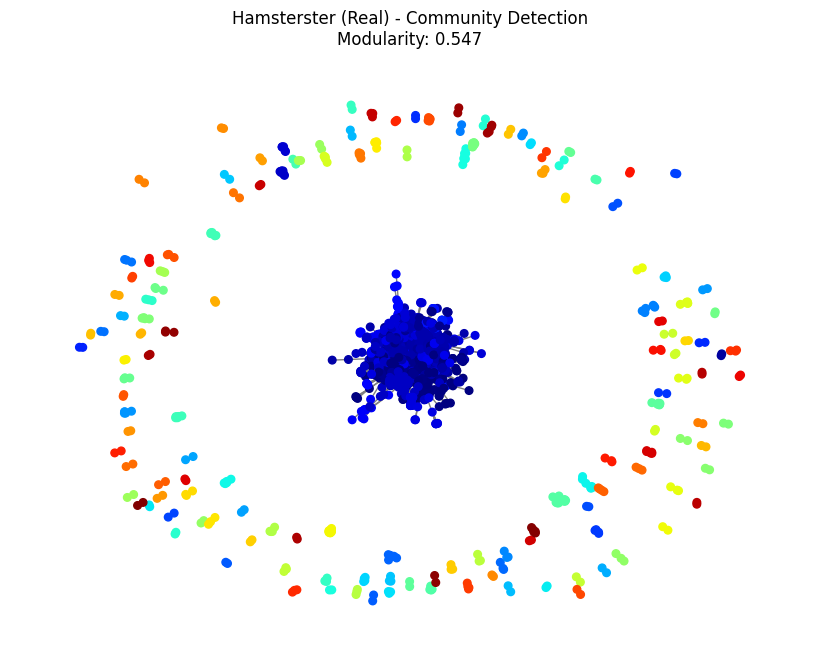

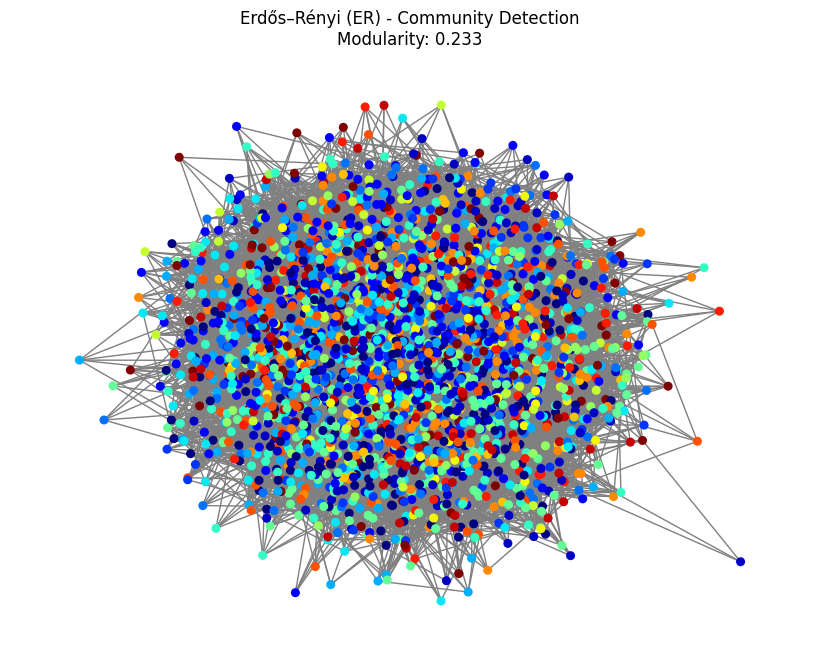

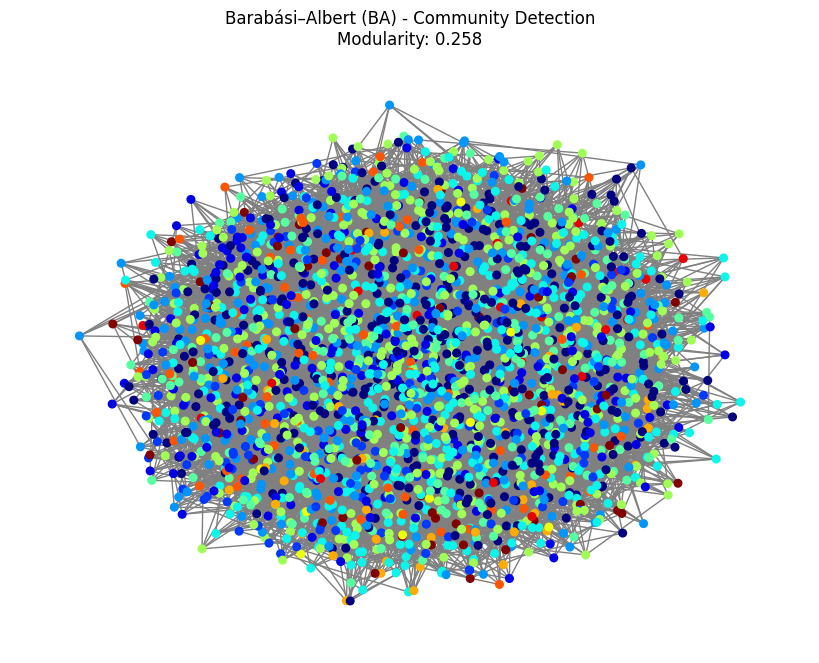

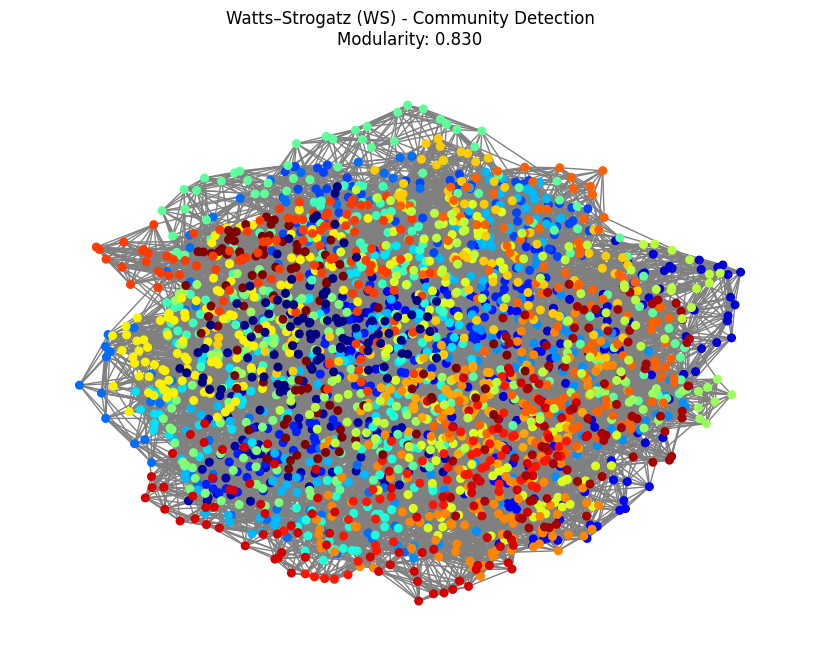

In [23]:
# community detection based on modularity : Based on the Louvain Method

# Function to detect and visualize communities in each graph
def analyze_communities(G, title):
    # Apply the Luvain detection method (detect communities)
    partition = community.best_partition(G)
    # Compute modularity score
    modularity_score = community.modularity(partition, G)
    #print(f"{title} - Modularity Score: {modularity_score:.3f}")

    # Visualize the results
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)
    colors = [partition[node] for node in G.nodes()]
    nx.draw(G, pos, with_labels=False, node_color=colors, cmap=plt.cm.jet, edge_color="gray", node_size=30)
    plt.title(f"{title} - Community Detection\nModularity: {modularity_score:.3f}")# print each network's modularity score besides its title
    plt.show()

    return modularity_score, partition

# Run on each network
mod_ham, part_ham = analyze_communities(G_ham, "Hamsterster (Real)")
mod_er, part_er = analyze_communities(G_er, "Erdős–Rényi (ER)")
mod_ba, part_ba = analyze_communities(G_ba, "Barabási–Albert (BA)")
mod_ws, part_ws = analyze_communities(G_ws, "Watts–Strogatz (WS)")


**Linear threshold model**

Hamsterster | Seeds: 5 → Activated: 263
Hamsterster | Seeds: 10 → Activated: 605
Hamsterster | Seeds: 20 → Activated: 720
Hamsterster | Seeds: 30 → Activated: 1040
Hamsterster | Seeds: 100 → Activated: 1351
Erdős–Rényi | Seeds: 5 → Activated: 108
Erdős–Rényi | Seeds: 10 → Activated: 216
Erdős–Rényi | Seeds: 20 → Activated: 282
Erdős–Rényi | Seeds: 30 → Activated: 572
Erdős–Rényi | Seeds: 100 → Activated: 1198
Barabási–Albert | Seeds: 5 → Activated: 1176
Barabási–Albert | Seeds: 10 → Activated: 983
Barabási–Albert | Seeds: 20 → Activated: 1394
Barabási–Albert | Seeds: 30 → Activated: 1319
Barabási–Albert | Seeds: 100 → Activated: 1725
Watts–Strogatz | Seeds: 5 → Activated: 18
Watts–Strogatz | Seeds: 10 → Activated: 121
Watts–Strogatz | Seeds: 20 → Activated: 136
Watts–Strogatz | Seeds: 30 → Activated: 270
Watts–Strogatz | Seeds: 100 → Activated: 580


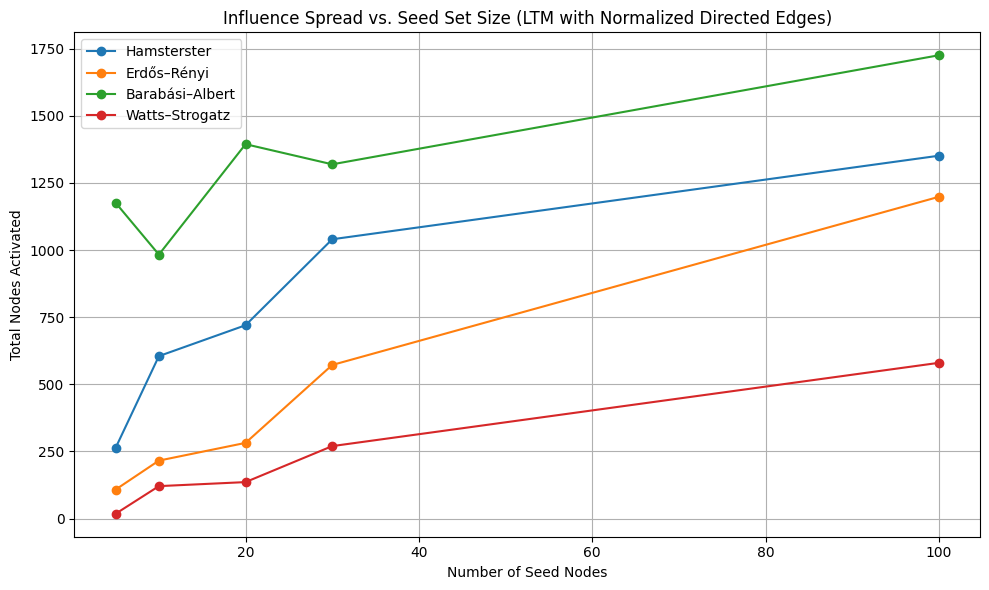

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


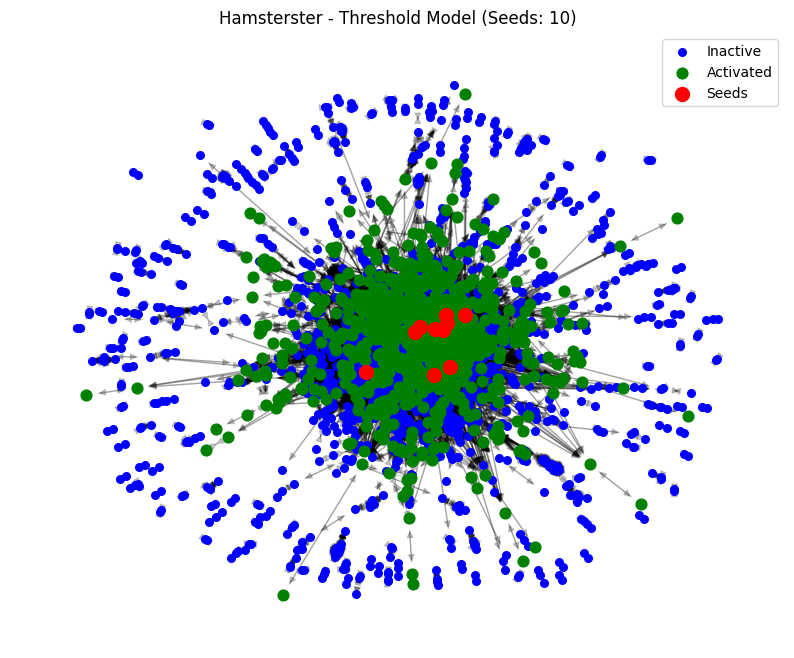

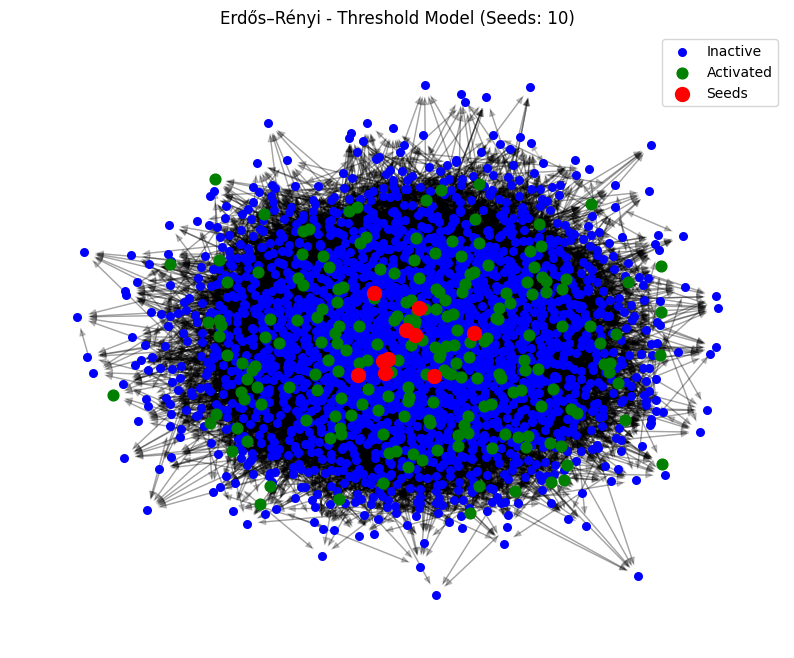

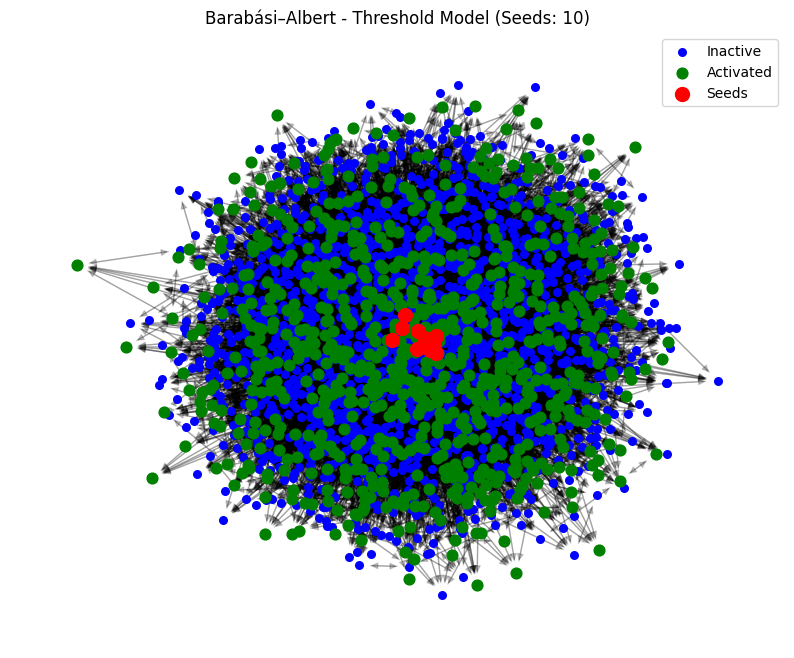

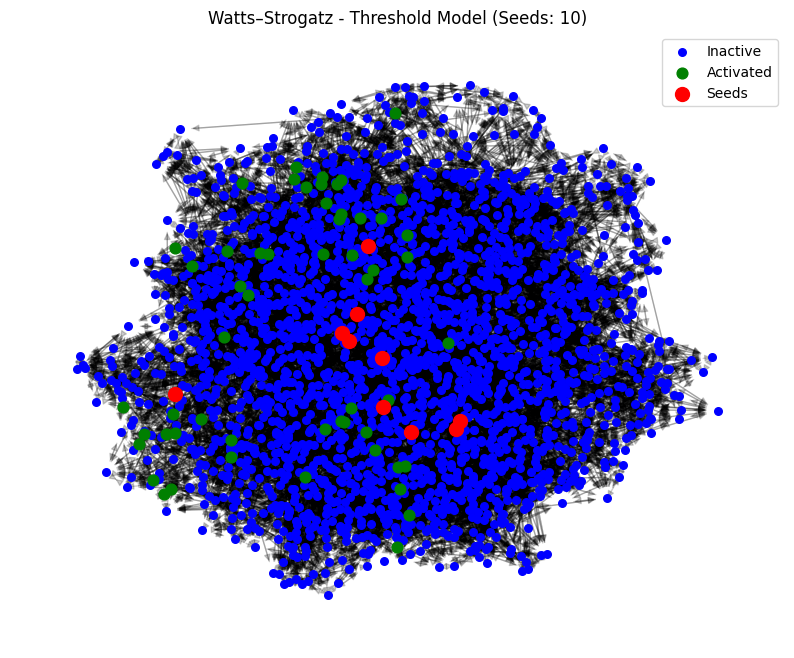

In [24]:
#Linear threshmodel with the highest node degree strategie for all networks

# this is to ensure that once the random operations are assined they keep the same results everytime the cpde run
random.seed(42)

# convert the graphs to directed graphs and add normalised edges
def prepare_directed_graph_with_thresholds(G):
    DG = nx.DiGraph()
    DG.add_nodes_from(G.nodes())

    # Add directed edges in both directions
    for u, v in G.edges():
        DG.add_edge(u, v)
        DG.add_edge(v, u)

    # Assign random thresholds to each node from 1 to 0
    for node in DG.nodes():
        DG.nodes[node]['threshold'] = random.uniform(0, 1)

    # assign randomg edge weights
    for node in DG.nodes():
        in_edges = list(DG.in_edges(node))
        total_in = len(in_edges)
        if total_in > 0:
            weights = [random.uniform(0, 1) for _ in in_edges]
            weight_sum = sum(weights)
            for (i, (u, v)) in enumerate(in_edges):
                DG[u][v]['weight'] = weights[i] / weight_sum  # normalize
    return DG

# Linear Threshold Model (Directed, Weighted)
'''so this model takes seed nodes that are already activated , search for their
numbers and then based on its mathematical alghoritm if the sum of the weights
and the threshold is > than the value of the threshold of the neighbour nodes than the seed node is able to activate the
its neighbour'''

def linear_threshold_model_directed(G, seed_set):
    active_nodes = set(seed_set)
    newly_active = set(seed_set)

    while newly_active:
        current_active = set()
        for node in G.nodes():
            if node not in active_nodes:
                influence = sum(G[u][node]['weight'] for u in G.predecessors(node) if u in active_nodes)
                if influence >= G.nodes[node]['threshold']:
                    current_active.add(node)
        if not current_active:
            break
        active_nodes.update(current_active)
        newly_active = current_active
    return active_nodes

# Influence Spread vs. Seed Size Plot
def influence_vs_seed_size(G, name, seed_sizes=[5, 10, 20, 30, 100]): #the size of the seeed nodes changes to have more insgihtful results

    counts = []
    for size in seed_sizes:
        DG = prepare_directed_graph_with_thresholds(G)
        seeds = sorted(DG.degree, key=lambda x: x[1], reverse=True)[:size]
        seed_nodes = [node for node, _ in seeds]
        active = linear_threshold_model_directed(DG, seed_nodes)
        counts.append(len(active))
        print(f"{name} | Seeds: {size} → Activated: {len(active)}")
    plt.plot(seed_sizes, counts, marker='o', label=name)
    return counts

# Visualize  the Spread of the threshold
def visualize_threshold_spread(G, name, seed_size=10):
    DG = prepare_directed_graph_with_thresholds(G)
    seeds = sorted(DG.degree, key=lambda x: x[1], reverse=True)[:seed_size]
    seed_nodes = [node for node, _ in seeds]
    active = linear_threshold_model_directed(DG, seed_nodes)

    pos = nx.spring_layout(DG, seed=42)
    plt.figure(figsize=(10, 8))
    nx.draw_networkx_nodes(DG, pos, nodelist=[n for n in DG.nodes() if n not in active], node_color='blue', label='Inactive', node_size=30)
    nx.draw_networkx_nodes(DG, pos, nodelist=[n for n in active if n not in seed_nodes], node_color='green', label='Activated', node_size=60)
    nx.draw_networkx_nodes(DG, pos, nodelist=seed_nodes, node_color='red', label='Seeds', node_size=100)
    nx.draw_networkx_edges(DG, pos, alpha=0.2)
    plt.title(f"{name} - Threshold Model (Seeds: {seed_size})")
    plt.axis("off")
    plt.legend()
    plt.show()

# Prepare all graphs (already defined outside this cell)
graphs = {
    "Hamsterster": G_ham,
    "Erdős–Rényi": G_er,
    "Barabási–Albert": G_ba,
    "Watts–Strogatz": G_ws,
}

# Run influence spread comparison
plt.figure(figsize=(10, 6))
for name, G in graphs.items():
    influence_vs_seed_size(G, name)
plt.xlabel("Number of Seed Nodes")
plt.ylabel("Total Nodes Activated")
plt.title("Influence Spread vs. Seed Set Size (LTM with Normalized Directed Edges)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

visualize_threshold_spread(G_ham, "Hamsterster")
visualize_threshold_spread(G_er, "Erdős–Rényi")
visualize_threshold_spread(G_ba, "Barabási–Albert")
visualize_threshold_spread(G_ws, "Watts–Strogatz")

In [25]:
#Linear threshold model for hamsterster Network based on 4 strategies :


def visualize_threshold_spread(G, name, seed_size=10, strategy="degree"):
    DG = prepare_directed_graph_with_thresholds(G)

    # Choose seed nodes based on strategy:  WE HAVE 4 Strategies
    if strategy == "degree":
        seeds = sorted(DG.degree, key=lambda x: x[1], reverse=True)[:seed_size]
    elif strategy == "pagerank":
        pr = nx.pagerank(DG)
        seeds = sorted(pr.items(), key=lambda x: x[1], reverse=True)[:seed_size]
    elif strategy == "betweenness":
        bt = nx.betweenness_centrality(DG)
        seeds = sorted(bt.items(), key=lambda x: x[1], reverse=True)[:seed_size]
    elif strategy == "closeness":
        cl = nx.closeness_centrality(DG)
        seeds = sorted(cl.items(), key=lambda x: x[1], reverse=True)[:seed_size]
    else:
        raise ValueError("Unsupported strategy. Use 'degree', 'pagerank', 'betweenness', or 'closeness'.")

    seed_nodes = [node for node, _ in seeds]
    active = linear_threshold_model_directed(DG, seed_nodes)

    # Visualization
    pos = nx.spring_layout(DG, seed=42)
    plt.figure(figsize=(10, 8))
    nx.draw_networkx_nodes(DG, pos, nodelist=[n for n in DG.nodes() if n not in active],
                           node_color='blue', label='Inactive', node_size=30)
    nx.draw_networkx_nodes(DG, pos, nodelist=[n for n in active if n not in seed_nodes],
                           node_color='green', label='Activated', node_size=60)
    nx.draw_networkx_nodes(DG, pos, nodelist=seed_nodes,
                           node_color='red', label='Seed Nodes', node_size=100)
    nx.draw_networkx_edges(DG, pos, alpha=0.2)
    plt.title(f"{name} - Threshold Model ({strategy.capitalize()} Strategy, Seeds: {seed_size})")
    plt.axis("off")
    plt.legend()
    plt.show()


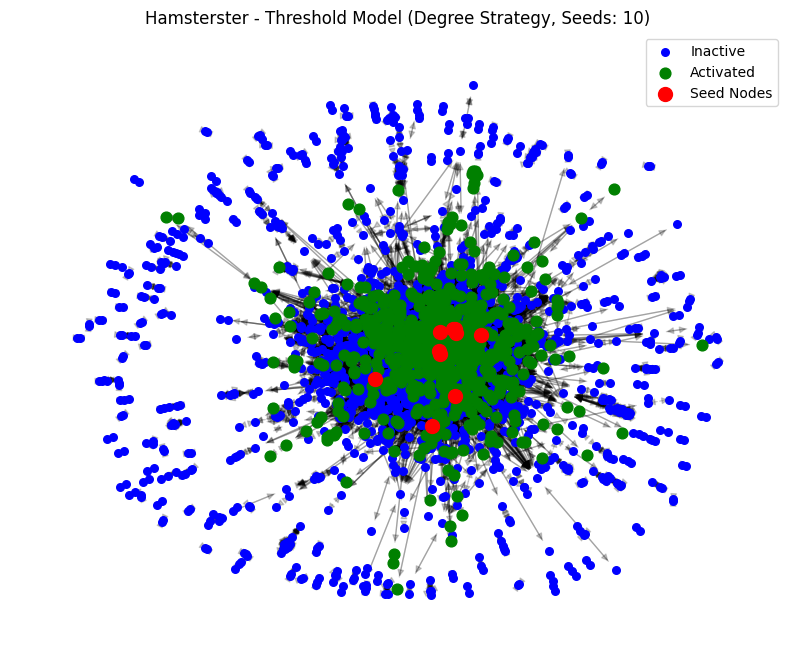

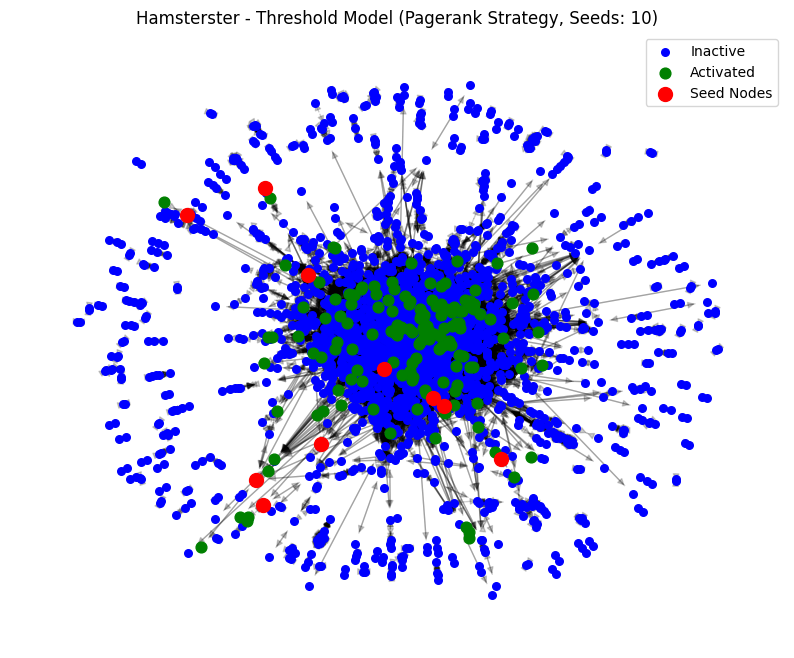

In [ ]:
# Visualize different strategies for Hamsterster network
visualize_threshold_spread(G_ham, "Hamsterster", seed_size=10, strategy="degree")
visualize_threshold_spread(G_ham, "Hamsterster", seed_size=10, strategy="pagerank")
visualize_threshold_spread(G_ham, "Hamsterster", seed_size=10, strategy="betweenness")
visualize_threshold_spread(G_ham, "Hamsterster", seed_size=10, strategy="closeness")
